In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('C:/Users/ASUS/OneDrive/Desktop/code/projects/free-time-analyzer/dataset/raw/free_time_sample.csv')


In [7]:
#verify data
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Person              100 non-null    object
 1   Date                100 non-null    object
 2   Start Time          100 non-null    object
 3   End Time            100 non-null    object
 4   Activity            100 non-null    object
 5   Duration (minutes)  100 non-null    int64 
 6   Notes               100 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB


,Duration (minutes)
count,100.000000
mean,55.800000
std,20.788983
min,30.000000
25%,45.000000
50%,60.000000
75%,60.000000
max,90.000000


In [13]:
#checking data quality 
print(df.isnull().sum())
print(df.duplicated().sum())

df.drop_duplicates(inplace=True)
df.dropna(inplace=True)


Person                0
Date                  0
Start Time            0
End Time              0
Activity              0
Duration (minutes)    0
Notes                 0
dtype: int64
0


count    100.000000
mean      55.800000
std       20.788983
min       30.000000
25%       45.000000
50%       60.000000
75%       60.000000
max       90.000000
Name: Duration (minutes), dtype: float64


Text(0.5, 1.0, 'Distribution of Free Time Duration')

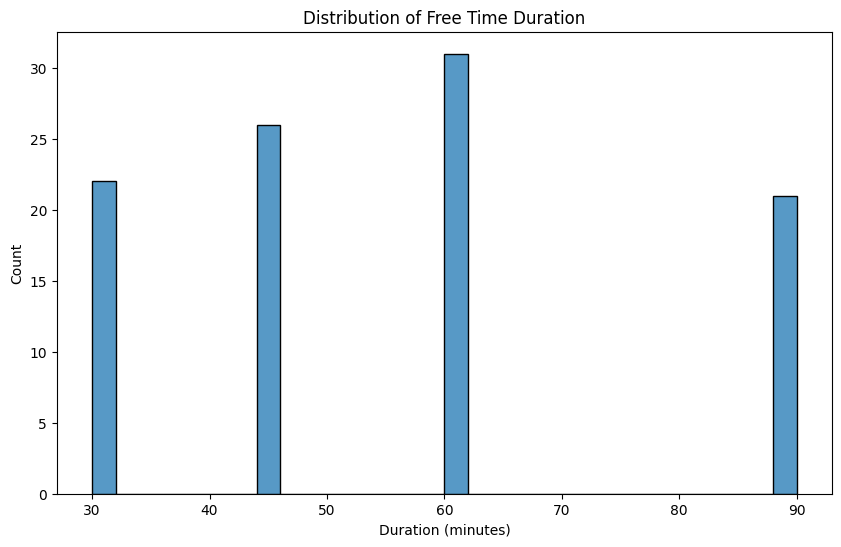

In [16]:
print(df['Duration (minutes)'].describe())
plt.figure(figsize=(10,6))
sns.histplot(df['Duration (minutes)'], bins=30, kde=False)
plt.title('Distribution of Free Time Duration')

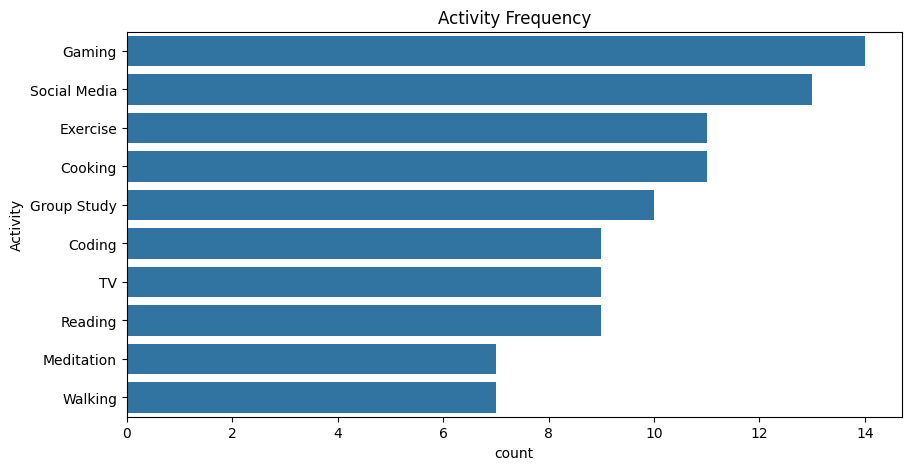

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(y='Activity', data=df, order=df['Activity'].value_counts().index)
plt.title('Activity Frequency')
plt.show()


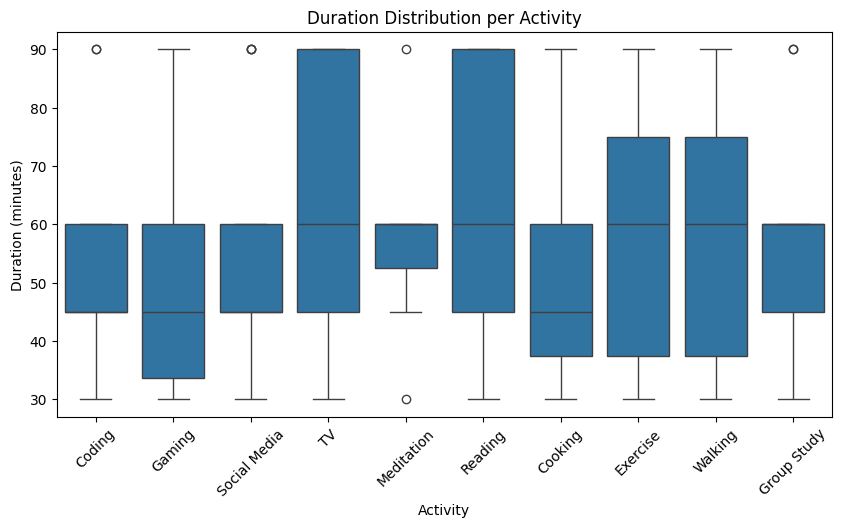

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Activity', y='Duration (minutes)', data=df)
plt.xticks(rotation=45)
plt.title('Duration Distribution per Activity')
plt.show()


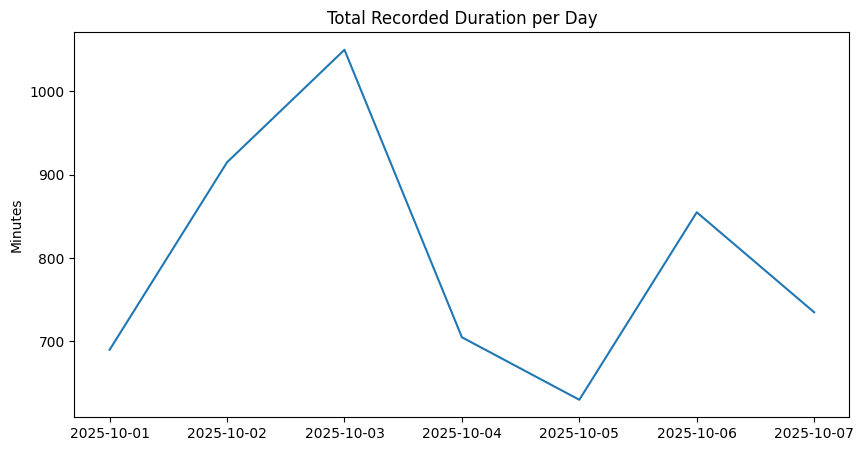

In [22]:
df['Date'] = pd.to_datetime(df['Date'])
daily = df.groupby('Date')['Duration (minutes)'].sum()
plt.figure(figsize=(10,5))
plt.plot(daily.index, daily.values)
plt.title('Total Recorded Duration per Day')
plt.ylabel('Minutes')
plt.show()


In [25]:
df.to_csv('C:/Users/ASUS/OneDrive/Desktop/code/projects/free-time-analyzer/dataset/processed/free_time_cleaned.csv', index=False)
